## Срвнение противопоточной схемы и схемы Бима-Уорминга для решения краевой задачи для уравнения переноса

In [153]:
from mpl_toolkits import mplot3d
from math import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [154]:
error_list1 = []
NormL2_list1 = []
NormC_list1 = []
ErrorNormL2_list1 = []
ErrorNormC_list1 = []
error_list2 = []
NormL2_list2 = []
NormC_list2 = []
ErrorNormL2_list2 = []
ErrorNormC_list2 = []

In [187]:
a = 1
Nx = 400      # Nx < Nt, тогда условие Куранта выполнится, и решение будет устойчивым
Nt = 10*Nx
h = 1 / Nx
tau = 1 / Nt
L = 20
x = np.linspace(0, 1, Nx) # массив по координате
t = np.linspace(0, 1, Nt) # массив по времени

In [188]:
U1, U2 = np.zeros((Nx, Nt)), np.zeros((Nx, Nt)) # массив для приближенного решения
U_toch1 = np.zeros((Nx, Nt)) # массив для точного решения 

In [189]:
# для точного решения
for i in range (Nt):
    for j in range (Nx):
        if j * h <= i * tau:
            U_toch1[j, i] = 1
        else:
            U_toch1[j, i] = 0

In [190]:
# граничные условия для противопоточная схемы
U1[0, :] = 1
U1[-1, :] = 0 
U1[:, 0] = 0

# граничные условия для схемы Бима-Уорминга
U2[0, :] = 1
U2[-1, :] = 0 
U2[:, 0] = 0

# приближенное решение для противопоточная схемы
for n in range(1, Nt - 1):
    for i in range(1, Nx):
        U1[i, n+1] = U1[i, n] + tau * a * (U1[i-1, n] - U1[i, n]) / h

# приближенное решение для схемы Бима-Уорминга    
for n in range(1, Nt-1): 
    for i in range(1, Nx-2):
        U2[i, n+1] = U2[i, n] - tau * a * (U2[i, n] - U2[i-1, n]) / h+ tau * tau * a * a * (U2[i, n] - 2 * U2[i+1, n] + U2[i+2, n]) / (2*h*h)

In [191]:
# противопоточная схема
error1 = np.sum(abs(U_toch1[:,Nt//2] - U1[:,Nt//2])) / Nx
norm_U1 = U1[:, Nt // 2] - U_toch1[:, Nt // 2]
NormL21 = (np.sum(abs(norm_U1))) / (np.sum(abs(U1[:, Nt//2])))
NormC1 = np.max(abs(U1[:, Nt // 2]))
ErrorNormL21 = sqrt(np.sum((U1[:, Nt - 1] - U_toch1[:, Nt - 1])**2) / np.sum((U_toch1[:, Nt - 1])**2))
ErrorNormC1 = (np.max(abs(U1[:, Nt//2] - U_toch1[:, Nt//2]))) / (np.max(abs(U_toch1[:, Nt//2])))

# схема Бима-Уорминга
error2 = np.sum(abs(U_toch1[:,Nt//2] - U2[:,Nt//2])) / Nx
norm_U2 = U2[:, Nt // 2] - U_toch1[:, Nt // 2]
NormL22 = (np.sum(abs(norm_U2))) / (np.sum(abs(U2[:, Nt//2])))
NormC2 = np.max(abs(U2[:, Nt // 2]))
ErrorNormL22 =  sqrt(np.sum((U2[:, Nt - 1] - U_toch1[:, Nt - 1])**2) / np.sum((U_toch1[:, Nt - 1])**2))
ErrorNormC2 = (np.max(abs(U2[:, Nt //2] - U_toch1[:, Nt //2]))) / (np.max(abs(U_toch1[:, Nt //2])))

In [197]:
 # противопоточная схема
error_list1.append(error1)
NormL2_list1.append(NormL21)
NormC_list1.append(NormC1)
ErrorNormL2_list1.append(ErrorNormL21)
ErrorNormC_list1.append(ErrorNormC1)

# схема Бима-Уорминга
error_list2.append(error2)
NormL2_list2.append(NormL22)
NormC_list2.append(NormC2)
ErrorNormL2_list2.append(ErrorNormL22)
ErrorNormC_list2.append(ErrorNormC2)

In [198]:
error_list1

[0.053401873651724677, 0.037803895744499362, 0.026746624358582567]

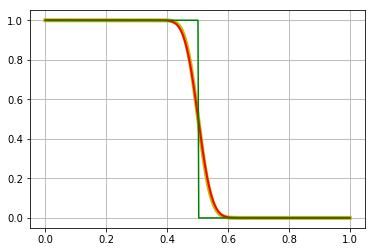

In [199]:
plt.plot(x, U1[:,Nt//2], c = 'y', linewidth=4)
plt.plot(x, U2[:,Nt//2], c = 'r', linewidth=2)
plt.plot(x, U_toch1[:, Nt//2], c = 'g') 
plt.grid(True)
plt.show()

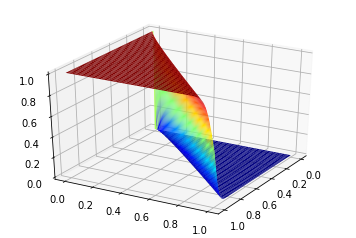

In [200]:
# приближенное решение в 3D для противопоточной схемы 
fig = plt.figure() 
X, T = np.meshgrid(t, x) # создаем сетку
ax = plt.axes(projection = '3d')
ax.plot_surface(X, T, U1, cmap = cm.jet)
ax.view_init(30, 30) # (y, x) - углы наклона соответственно
plt.show()

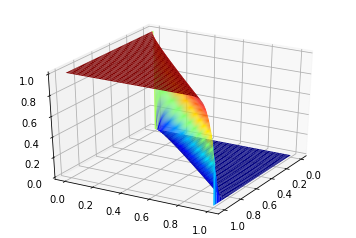

In [201]:
# приближенное решение в 3D для схемы Бима-Уорминга
fig = plt.figure() 
X, T = np.meshgrid(t, x) # создаем сетку
ax = plt.axes(projection = '3d')
ax.plot_surface(X, T, U2, cmap = cm.jet)
ax.view_init(30, 30) # (y, x) - углы наклона соответственно
plt.show()

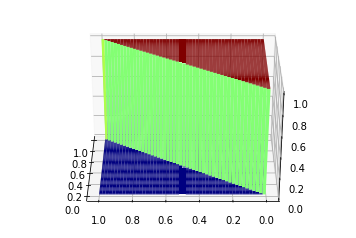

In [202]:
# точное решение в 3D
fig = plt.figure() 
ax = plt.axes(projection = '3d')
ax.plot_surface(X, T, U_toch1, cmap = cm.jet)
ax.view_init(30, 180) # (y, x) - углы наклона соответственно
plt.show()

In [203]:
Nx_list = [100,200,400]

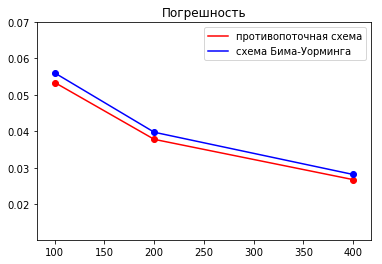

In [204]:
plt.scatter(Nx_list, error_list1, color = 'r')
plt.plot(Nx_list, error_list1, color = 'r', label='противопоточная схема')

plt.scatter(Nx_list, error_list2, color = 'b')
plt.plot(Nx_list, error_list2, color = 'b', label='схема Бима-Уорминга')

plt.title("Погрешность")
plt.legend()
plt.show()


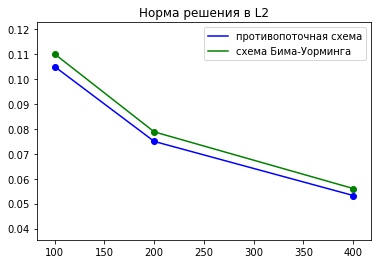

In [205]:
plt.scatter(Nx_list, NormL2_list1, color = 'b')
plt.plot(Nx_list, NormL2_list1, color = 'b', label='противопоточная схема')

plt.scatter(Nx_list, NormL2_list2, color = 'g')
plt.plot(Nx_list, NormL2_list2, color = 'g', label='схема Бима-Уорминга')

plt.title("Норма решения в L2")
plt.legend()
plt.show()

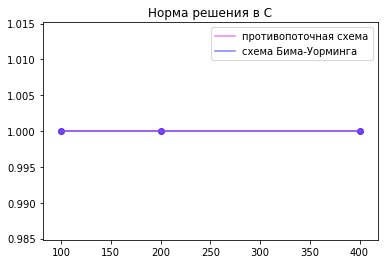

In [207]:
plt.scatter(Nx_list, NormC_list1, color = 'violet')
plt.plot(Nx_list, NormC_list1, color = 'violet', label='противопоточная схема')

plt.scatter(Nx_list, NormC_list2, color = 'b', alpha=0.5) 
plt.plot(Nx_list, NormC_list2, color = 'b', label='схема Бима-Уорминга', alpha=0.5)

plt.title("Норма решения в C")
plt.legend()
plt.show()

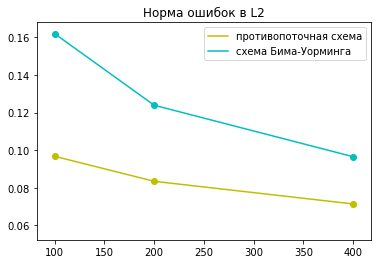

In [208]:
plt.scatter(Nx_list, ErrorNormL2_list1, color = 'y')
plt.plot(Nx_list, ErrorNormL2_list1, color = 'y', label='противопоточная схема')

plt.scatter(Nx_list, ErrorNormL2_list2, color = 'c')
plt.plot(Nx_list, ErrorNormL2_list2, color = 'c', label='схема Бима-Уорминга')

plt.title("Норма ошибок в L2")
plt.legend()
plt.show()

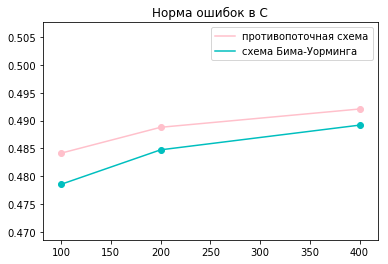

In [209]:
plt.scatter(Nx_list, ErrorNormC_list1, color = 'pink')
plt.plot(Nx_list, ErrorNormC_list1, color = 'pink', label='противопоточная схема')

plt.scatter(Nx_list, ErrorNormC_list2, color = 'c')
plt.plot(Nx_list, ErrorNormC_list2, color = 'c', label='схема Бима-Уорминга')

plt.title("Норма ошибок в C")
plt.legend()
plt.show()